In [1]:
import pandas as pd


In [64]:
df2=pd.read_csv("kc_house_data.csv")

In [3]:
## Question 1
df2


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
import matplotlib.pyplot as plt

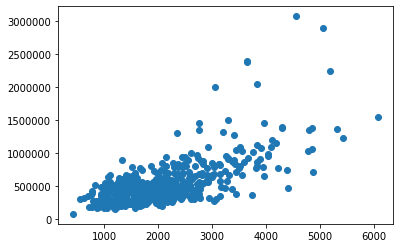

In [100]:
x=df2[:500]
plt.plot(x["sqft_living"],x["price"],"o")
x
plt.show()

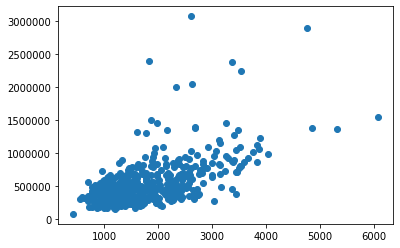

In [39]:
x=df2[:500]
plt.plot(x["sqft_above"],x["price"],"o")
x
plt.show()

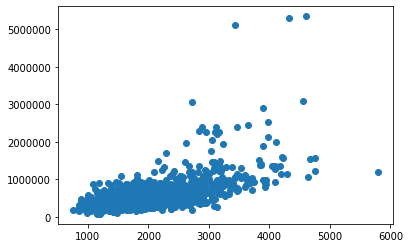

In [102]:
x=df2[:1500]
plt.plot(x["sqft_living15"],x["price"],"o")

plt.show()

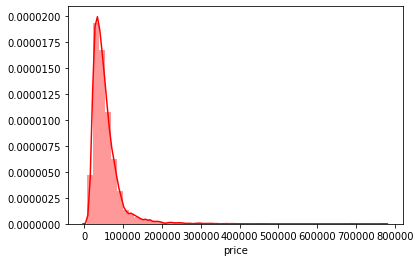

In [50]:
sns.distplot(df2["price"]/10,bins=50,hist=True,kde=True,color="red")

In [10]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 10)


In [11]:
X_1=df2[["id","bedrooms","bathrooms","sqft_living"]]
y_1=df2["price"].values
fs=SelectKBest(score_func=f_regression, k='all')
X_select=fs.fit_transform(X_1,y_1)

In [12]:
X_select

array([[7.12930052e+09, 3.00000000e+00, 1.00000000e+00, 1.18000000e+03],
       [6.41410019e+09, 3.00000000e+00, 2.25000000e+00, 2.57000000e+03],
       [5.63150040e+09, 2.00000000e+00, 1.00000000e+00, 7.70000000e+02],
       ...,
       [1.52330014e+09, 2.00000000e+00, 7.50000000e-01, 1.02000000e+03],
       [2.91310100e+08, 3.00000000e+00, 2.50000000e+00, 1.60000000e+03],
       [1.52330016e+09, 2.00000000e+00, 7.50000000e-01, 1.02000000e+03]])

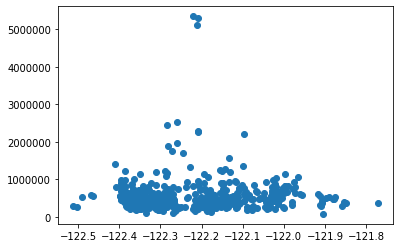

In [56]:
x=df2[1000:1500]
plt.plot(x["long"],x["price"],"o")
x
plt.show()

### Question 2

### the chose of the features to select depend of the correlation between the price (target) and the features 
By observing the graphs we can see that there’s a positive correlation between sqft_living,sqlt_above,sqlt_living15 and price. 




In [108]:
## 3
from sklearn.model_selection import train_test_split

X=df2[["sqft_living"]]
y=df2["price"]
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.20,random_state=30)
X_train

,sqft_living
13182,970
14863,2040
11234,1830
19105,1250
12544,1350
...,...
500,3180
12077,1930
15277,3230
4517,1930


### 4. Apply Linear regression to your training set. 

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
model=LinearRegression()   #build linear regression model
model.fit(X_train,Y_train)  #fitting the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 5. Plot the linear regression. 

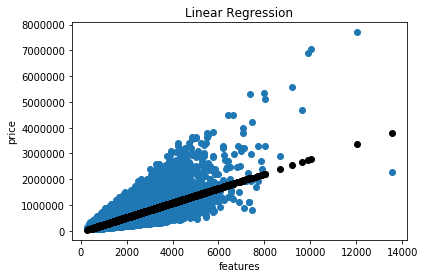

In [111]:
plt.plot(X,y,'o')
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("features")
plt.plot(X,model.predict(X),'o',color="k")
plt.show()

### 5. Measure the performance of linear regression using the testing set. 

In [113]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
predicted=model.predict(X_test)
print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))

MSE 64179676631.68387
R squared 0.4879814110728806


### 49 % of the out put variation can be explained by the model's input's

### 6. Apply multi-linear regression and compare it to the linear model. 

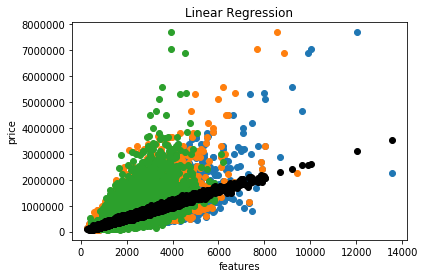

In [128]:
X2=df2[["sqft_living","sqft_above","sqft_living15"]]
X2_train,X2_test,Y2_train,Y2_test= train_test_split(X2,y,test_size=0.20,random_state=30)
model_2=LinearRegression()   #build linear regression model
model_2.fit(X2_train,Y2_train)  #fitting the training data

plt.plot(X2,y,'o')
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("features")
plt.plot(X,model.predict(X2),'o',color="k")
plt.show()

In [118]:
predicted=model.predict(X2_test)
print("MSE", mean_squared_error(Y2_test,predicted))
print("R squared", metrics.r2_score(Y2_test,predicted))

MSE 63704071748.811516
R squared 0.4917757359089602


### 49 % of the out put variation can be explained by the model's input's, the same as linear regression


### 7. Apply Polynomial regression and compare it to the linear and multilinear regression. 

In [130]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 4) 
x_=poly.fit_transform(X2_train)
print("x before transformation: ", X2)
print("x after transformation: ", x_)

x before transformation:         sqft_living  sqft_above  sqft_living15
0             1180        1180           1340
1             2570        2170           1690
2              770         770           2720
3             1960        1050           1360
4             1680        1680           1800
...            ...         ...            ...
21608         1530        1530           1530
21609         2310        2310           1830
21610         1020        1020           1020
21611         1600        1600           1410
21612         1020        1020           1020

[21613 rows x 3 columns]
x after transformation:  [[1.00000000e+00 9.70000000e+02 9.70000000e+02 ... 2.11702500e+12
  3.27375000e+12 5.06250000e+12]
 [1.00000000e+00 2.04000000e+03 2.04000000e+03 ... 1.24552526e+13
  1.05625427e+13 8.95745041e+12]
 [1.00000000e+00 1.83000000e+03 1.46000000e+03 ... 1.15722432e+13
  1.84680320e+13 2.94729552e+13]
 ...
 [1.00000000e+00 3.23000000e+03 3.23000000e+03 ... 1.08172480e+14
  1

In [133]:
model_4= LinearRegression()
model_4.fit(x_,Y2_train)
X2_test_ = poly.fit_transform(X2_test)
predicted2 = model_4.predict(X2_test_)

print("MSE: ", metrics.mean_squared_error(Y2_test, predicted2))
print("R squared: ", metrics.r2_score(Y2_test,predicted2))

MSE:  57068635888.37796
R squared:  0.5447125327967517


### the R squared is better than linear regression and multi-linear regression, 54 % of the out put variation can be explained by the model's input's